# Job Qualification Analysis

In [3]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
import scipy.stats as st
import numpy as np

## Step 1: Quantification
First I extracted the required skills and experience and desirable qualifications from the job posting.

    Required Skills and Experience:
    1. 10+ years in construction operations delivering and/or managing work (e.g., project executive, project manager, or other operations leadership role)
    2. Experience managing schedule, safety, cost, quality and other project risk factors on multi-million dollar projects 
    3. 2+ years working in or studying data science 
    4. Passion for improving project delivery outcomes for owners and contractors (i.e., delivery teams) of all sizes in the global AEC industry
    5. Ability to convey complex concepts in terms understandable to the lay person
    6. Some SaaS or network-based business expertise
    7. Strong business sense and ability to grasp customer’s needs and expectations.  The ability to manage multiple parallel initiatives and stakeholders will be critical. 
    8. Significant people and organizational management skills.

    Desirable: 
    9. Experience with Analytics & AI as a contractor or owner
    10. Experience in a fast-growing business

Then I created a numerical weighted criteria to the qualitative requirements and qualifications to quantify potential relative importance of each criterion. This allows for a systematic and objective evaluation for candidates. Below is the weighted criteria.
    Required Skills and Experience (1-8): 75% of total score
    Desirable Qualifications (9-10): 25% of total score

Within each category it is possible to further assign weights to each individual point based on importance. Each individual point is weighted equally.
    1-8: Weight these equally due to time sensitivity
    9-10: Weight these equally because they're both desirable but not required.

In [4]:
# Create a dictionary for required skills, experience and desirable qualitications. Keys summarize the criteria and values are shortened bullet points directly from the job posting.
criteria_definitions = {
    "Construction Experience": "0+ years in construction operations delivering and/or managing work",
    "Construction Management": "Experience managing schedule, safety, cost, quality and other project risk factors on multi-million dollar projects",
    "Data Science Experience": "2+ years working in or studying data science",
    "Passion for Project Delivery": "Passion for improving project delivery outcomes for owners and contractors (i.e.,delivery teams) of all sizes",
    "Communication Skills": "Ability to convey complex concepts in terms understandable to the lay person",
    "SaaS/Network Expertise": "Some SaaS or network-based business expertise",
    "Business Acumen": "Strong business sense and ability to grasp customer’s needs and expectations. The ability to manage multiple parallel initiatives and stakeholders will be critical.",
    "Organizational Leadership": "Significant people and organizational management skills.",
    "AEC Analytics & AI": "Experience with Analytics & AI as a contractor or owner",
    "Scaling Business": "Experience in a fast-growing business"
}

# Extract the keys from the dictionary and convert them to a list
criteria_list = list(criteria_definitions.keys())

# # Print the list
print(criteria_list)

['Construction Experience', 'Construction Management', 'Data Science Experience', 'Passion for Project Delivery', 'Communication Skills', 'SaaS/Network Expertise', 'Business Acumen', 'Organizational Leadership', 'AEC Analytics & AI', 'Scaling Business']


## Step 2: Scoring My Qualifications
Rate my level of qualification for each requirement on a scale (e.g., 0-10, where 10 is fully qualified).

In [5]:
# Create new dictionary to store the my qualificaiton score
qualification_scores = {}

# Loop through the dictionary keys
for key in criteria_definitions.keys():
    # Prompt to rate my qualification
    rating = input(f"Rate your qualification for {key} (0-10): ")
    
    # Validation loop
    while not rating.isdigit() or not (0 <= int(rating) <= 10):
        print("Invalid input. Please enter a number between 0 and 10.")
        rating = input(f"Rate your qualification for {key} (0-10): ")
    
    # Store rating in the dictionary
    qualification_scores[key] = int(rating)

# Create a DataFrame from ratings
df = pd.DataFrame(list(qualification_scores.items()), columns=['Qualification', 'Score'])

Rate your qualification for Construction Experience (0-10): 10
Rate your qualification for Construction Management (0-10): 10
Rate your qualification for Data Science Experience (0-10): 4
Rate your qualification for Passion for Project Delivery (0-10): 10
Rate your qualification for Communication Skills (0-10): 8
Rate your qualification for SaaS/Network Expertise (0-10): 6
Rate your qualification for Business Acumen (0-10): 9
Rate your qualification for Organizational Leadership (0-10): 7
Rate your qualification for AEC Analytics & AI (0-10): 6
Rate your qualification for Scaling Business (0-10): 10


In [6]:
# Adjust index to start from 1
df.index = df.index + 1

# Output the DataFrame
df

,Qualification,Score
1,Construction Experience,10
2,Construction Management,10
3,Data Science Experience,4
4,Passion for Project Delivery,10
5,Communication Skills,8
6,SaaS/Network Expertise,6
7,Business Acumen,9
8,Organizational Leadership,7
9,AEC Analytics & AI,6
10,Scaling Business,10


## Step 3: Calculate Weighted Scores
Multiply each score by its respective weight. Each of the required skills (1-8) is weighted equally within its 75% category, and each point gets about 9.375% of that category. Desirable skills, each accounting for 12.5% within their 25% category.

In [7]:
# Define the weights for each skill based on whether they are required or desirable
weights = {
    "Construction Experience": 9.375,
    "Construction Management": 9.375,
    "Data Science Experience": 9.375,
    "Passion for Project Delivery": 9.375,
    "Communication Skills": 9.375,
    "SaaS/Network Expertise": 9.375,
    "Business Acumen": 9.375,
    "Organizational Leadership": 9.375,
    "AEC Analytics & AI": 12.5,
    "Scaling Business": 12.5
}
# Calculate weighted scores and add as a new column
df['Weighted Score'] = round(df['Qualification'].map(weights) * df['Score']/10, 1)

# Save DataFrame to csv
df.to_csv("qualification_data.csv", index=False)

# View DataFrame
df

,Qualification,Score,Weighted Score
1,Construction Experience,10,9.4
2,Construction Management,10,9.4
3,Data Science Experience,4,3.8
4,Passion for Project Delivery,10,9.4
5,Communication Skills,8,7.5
6,SaaS/Network Expertise,6,5.6
7,Business Acumen,9,8.4
8,Organizational Leadership,7,6.6
9,AEC Analytics & AI,6,7.5
10,Scaling Business,10,12.5


## Step 4: Visual Representation - Radar Chart
Create a radar chart to visually represent the raw scores. Each axis represents one of the skills or experiences, and the plotted points reflect my score. This visual displays how well-rounded my skills are in relation to the job requirements. I used the raw scores not weighted scores to standardize the radar circle to 10.


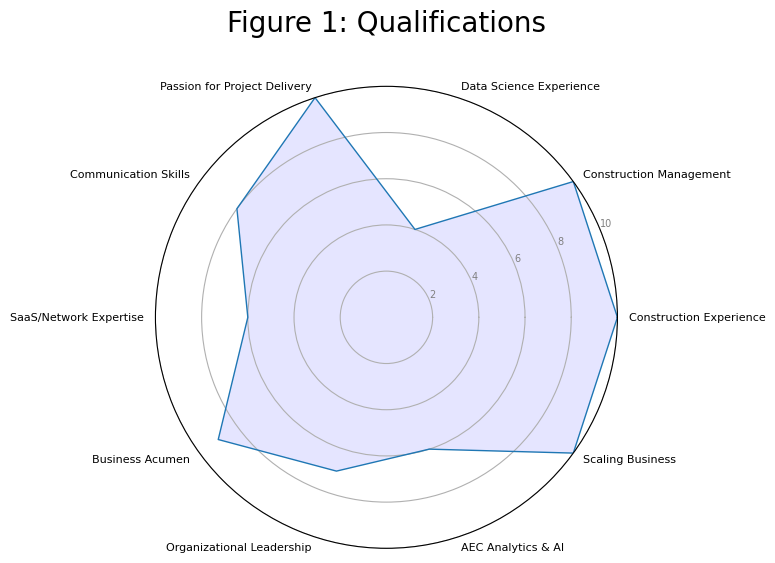

In [8]:
# Number of variables we're plotting.
categories = list(df['Qualification'])
N = len(categories)

# Create angle of each axis. Divide the plot / number of variable
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Completes the loop

# Initialise plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': 'polar'})

# Draw one axe per variable + add labels
for angle, category in zip(angles, categories):
    if category in ['Data Science Experience', 'Construction Management', 
                    'Construction Experience', 'Scaling Business', 
                    'AEC Analytics & AI']:
        ha = 'left'
    else:
        ha = 'right'
    ax.text(angle, 10.5, category, ha=ha, va='center', fontsize=8, color='black')

# Remove angle labels
ax.set_xticks([])

# Draw ylabels
plt.yticks([2, 4, 6, 8, 10], ["2", "4", "6", "8", "10"], color="grey", size=7)
plt.ylim(0, 10)

# Ind1
values = df['Score'].tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Score")
ax.fill(angles, values, 'b', alpha=0.1)

# Add title
plt.title('Figure 1: Qualifications', size=20, color='black', y=1.1)

# Save to png
fig.savefig('fig_1_radar_chart.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

## Step 5: Statistical Measurements
To incorporate statistical measurements:
Mean: Calculate the average weighted score across all categories to show my overall qualification level.
Standard Deviation: Measure the variance in my scores to show strengths (high scores) and areas for development (low scores).
Quartiles: Offer aditional insights into distribution.

In [9]:
# Required Qualficiations:Select rows 1-8 from the DataFrame and extract the 'Weighted Score' column
required_scores = df.loc[1:8, 'Weighted Score']

# Calculate mean and standard deviation for required qualifications
mean_score_required = round(np.mean(required_scores), 2)
std_deviation_required = round(np.std(required_scores), 2)

# Desired Qualificaitons: Select rows 9&10 from the DataFrame and extract the 'Weighted Score' column
desired_scores = df.loc[9:10, 'Weighted Score']

# Calculate mean and standard deviation for desired qualifications
mean_score_desired = round(np.mean(desired_scores), 2)
std_deviation_desired = round(np.std(desired_scores), 2)

# Calculate mean and standard deviation for all qualifications
mean_score = round(np.mean(df['Weighted Score']), 2)
std_deviation = round(np.std(df['Weighted Score']), 2)


print(f"Required Qualifications - Statistical Measurements\n"
      f"Mean Score: {mean_score_required}\n"
      f"Standard Deviation: {std_deviation_required}\n\n"
      f"Desired Qualifications - Statistical Measurements\n"
      f"Mean Score: {mean_score_desired}\n"
      f"Standard Deviation: {std_deviation_desired}\n\n"
      f"All Qualifications - Statistical Measurements\n"
      f"Mean Score: {mean_score}\n"
      f"Standard Deviation: {std_deviation}\n\n"
     )

Required Qualifications - Statistical Measurements
Mean Score: 7.51
Standard Deviation: 1.93

Desired Qualifications - Statistical Measurements
Mean Score: 10.0
Standard Deviation: 2.5

All Qualifications - Statistical Measurements
Mean Score: 8.01
Standard Deviation: 2.28




In [10]:
# Calculate quartiles for the 'Weighted Score' column
weighted_scores = df['Weighted Score']

# Calculate quartiles
q1 = round(weighted_scores.quantile(0.25), 2)
median = round(weighted_scores.quantile(0.5), 2)
q3 = round(weighted_scores.quantile(0.75), 2)

# Calculate the interquartile range
iqr = q3 - q1

# Print stats
print("Weighted Scores")
print("First Quartile (Q1):", q1)
print("Median (Q2):", median)
print("Third Quartile (Q3):", q3)
print("Interquartile Range (IQR):", iqr)

Weighted Scores
First Quartile (Q1): 6.82
Median (Q2): 7.95
Third Quartile (Q3): 9.4
Interquartile Range (IQR): 2.58


In [11]:
# Calculate quartiles for the raw 'Score' column
scores = df['Score']

# Calculate quartiles
q1 = round(scores.quantile(0.25), 2)
median = round(scores.quantile(0.5), 2)
q3 = round(scores.quantile(0.75), 2)

# Calculate the interquartile range
iqr = q3 - q1

# Print stats
print("Raw Scores")
print("First Quartile (Q1):", q1)
print("Median (Q2):", median)
print("Third Quartile (Q3):", q3)
print("Interquartile Range (IQR):", iqr)

Raw Scores
First Quartile (Q1): 6.25
Median (Q2): 8.5
Third Quartile (Q3): 10.0
Interquartile Range (IQR): 3.75


# # Step 6: Visual Representation - BoxPlot
Create a BoxPlot chart to visually represent the distribution and comparison of weighted and raw scores.

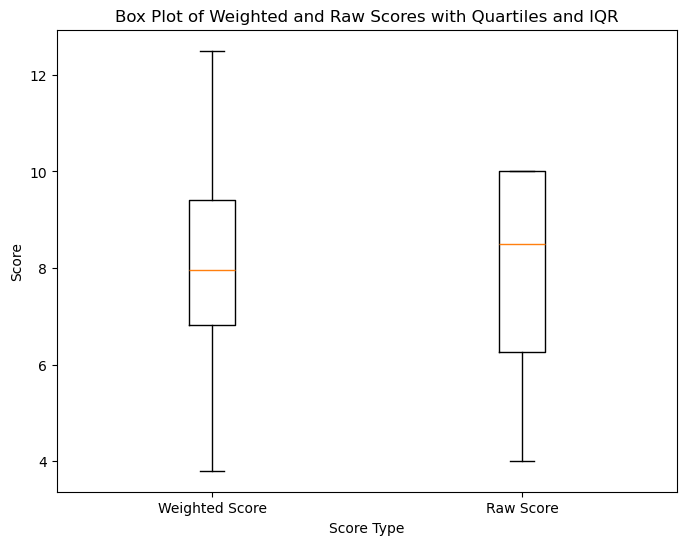

In [14]:
# Grab both types of scores
weighted_scores = df['Weighted Score']
score = df['Score']

# Create a box plot with outliers shown
plt.figure(figsize=(8, 6))
plt.boxplot([weighted_scores, score], showfliers=True)

# Add labels and title
plt.xlabel('Score Type')
plt.ylabel('Score')
plt.title('Box Plot of Weighted and Raw Scores with Quartiles and IQR')

# Customize x-axis ticks
plt.xticks([1, 2], ['Weighted Score', 'Raw Score'])

# Show the plot
plt.show()